In [92]:
library(dplyr)
library(corrplot)
library(pROC)
library(ggplot2)
library(grid)
library(gridExtra)
library(caret)
library(gbm)
library(rpart)
library(rpart.plot)
library(survival)
library(DMwR)
library(scales)
library(cowplot)
library(ggthemes)
library(randomForest)

In [3]:
options(warn=-1)

In [99]:
df_train<-read.csv("C:/Users/hitech services/Downloads/R Project - Attrition-20190227T152745Z-001/R Project - Attrition/Attrition.csv")

In [100]:
#datatype of attrtion data frame
str(df_train)

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 6

In [101]:
head(df_train)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [102]:
summary(df_train)

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

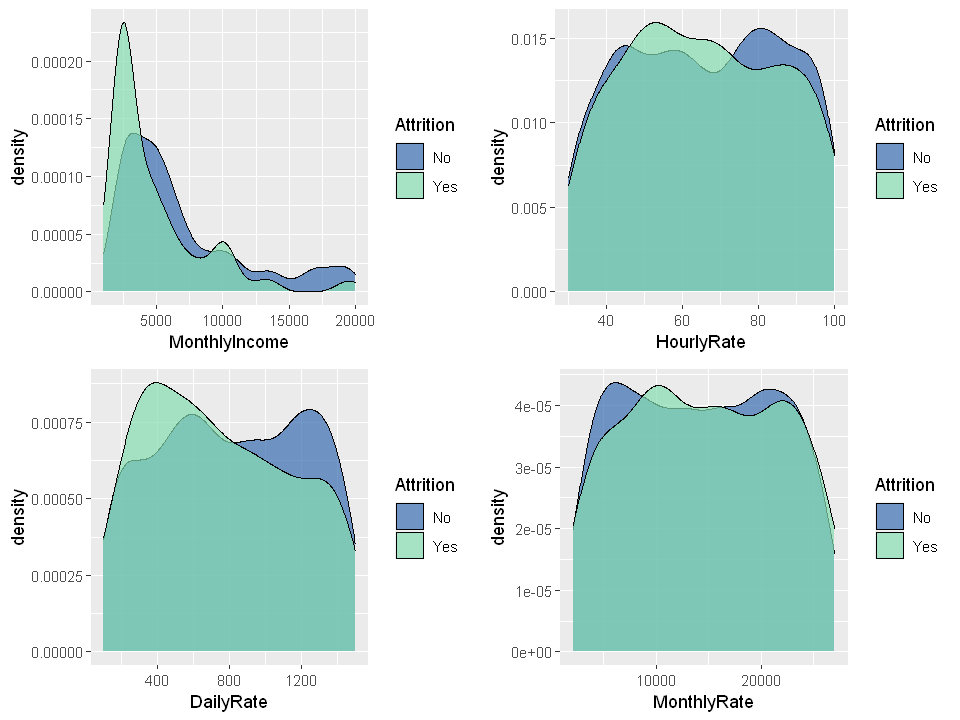

In [103]:
g1 <- ggplot(df_train, 
            aes(x = MonthlyIncome, fill = Attrition)) + 
            geom_density(alpha = 0.7) + 
            scale_fill_manual(values = c("#386cb0","#85ddb0"))

g2 <- ggplot(df_train, 
            aes(x = HourlyRate, fill = Attrition)) + 
            geom_density(alpha = 0.7) + 
            scale_fill_manual(values = c("#386cb0","#85ddb0"))

g3 <- ggplot(df_train, 
            aes(x = DailyRate, fill = Attrition)) + 
            geom_density(alpha = 0.7) + 
            scale_fill_manual(values = c("#386cb0","#85ddb0"))

g4 <- ggplot(df_train, 
            aes(x = MonthlyRate, fill = Attrition)) + 
            geom_density(alpha = 0.7) + 
            scale_fill_manual(values = c("#386cb0","#85ddb0"))

grid.arrange(g1, g2, g3, g4, ncol = 2, nrow = 2)

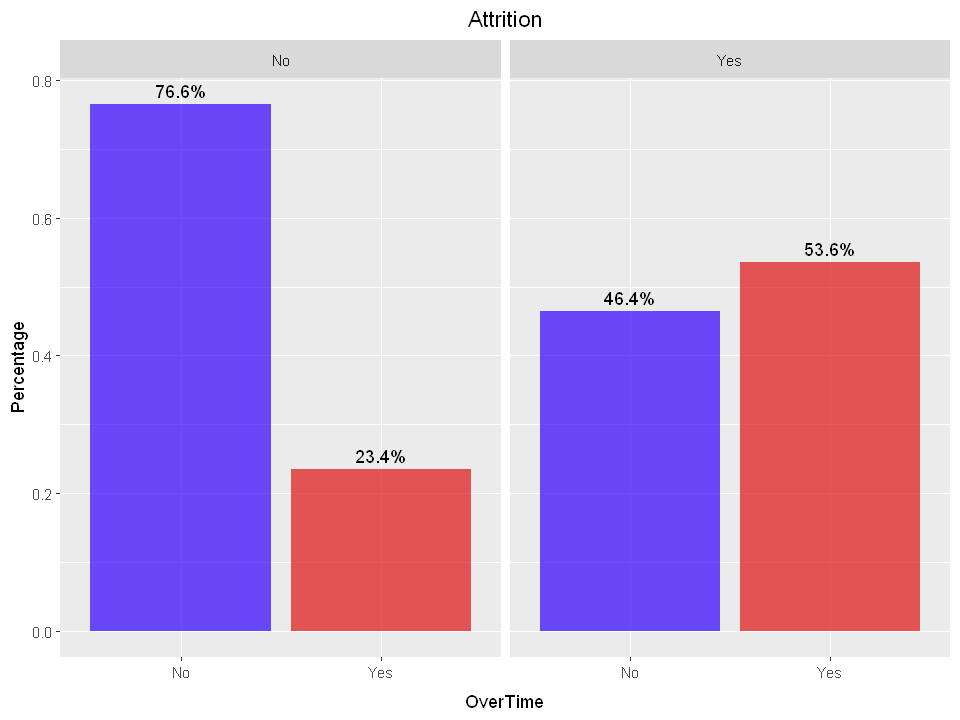

In [104]:
ggplot(df_train, 
        aes(x = OverTime, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                   stat="count", 
                   alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                   stat= "count", 
                   vjust = -.5) +
        labs(y = "Percentage", fill= "OverTime") +
        facet_grid(~Attrition) +
        scale_fill_manual(values = c("#2f00ff","#de1212")) + 
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

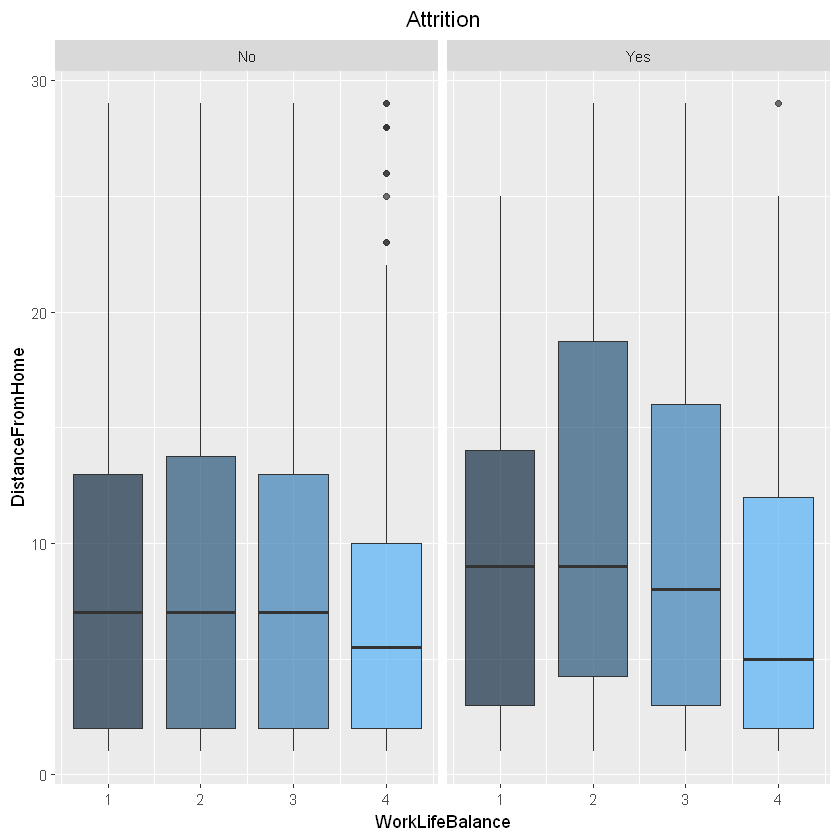

In [12]:
ggplot(df_train, 
        aes(x= WorkLifeBalance, y=DistanceFromHome, group = WorkLifeBalance, fill = WorkLifeBalance)) + 
        geom_boxplot(alpha=0.7) + 
        theme(legend.position="none") + 
        facet_wrap(~ Attrition) + 
        ggtitle("Attrition") + 
        theme(plot.title = element_text(hjust = 0.5))

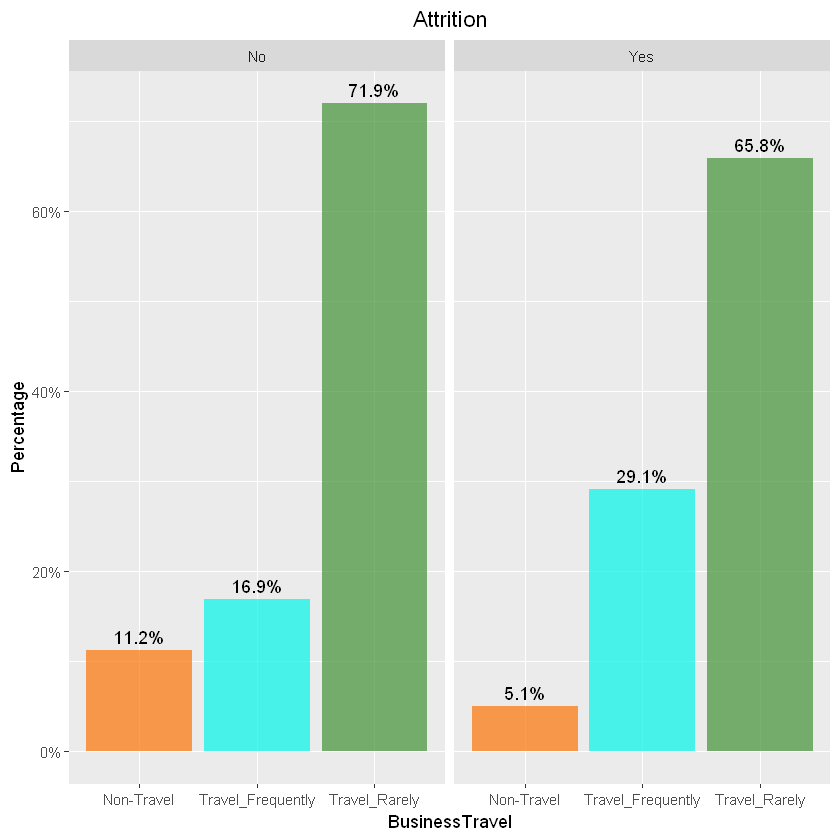

In [13]:
ggplot(df_train, 
        aes(x= BusinessTravel,  group=Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                   stat="count", 
                   alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                   stat= "count", 
                   vjust = -.5) +
        labs(y = "Percentage", fill="Business Travel") +
        facet_grid(~Attrition) +
        scale_y_continuous(labels=percent) + 
        scale_fill_manual(values = c("#fc7303","#00f7e7", "#3f9134")) + 
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

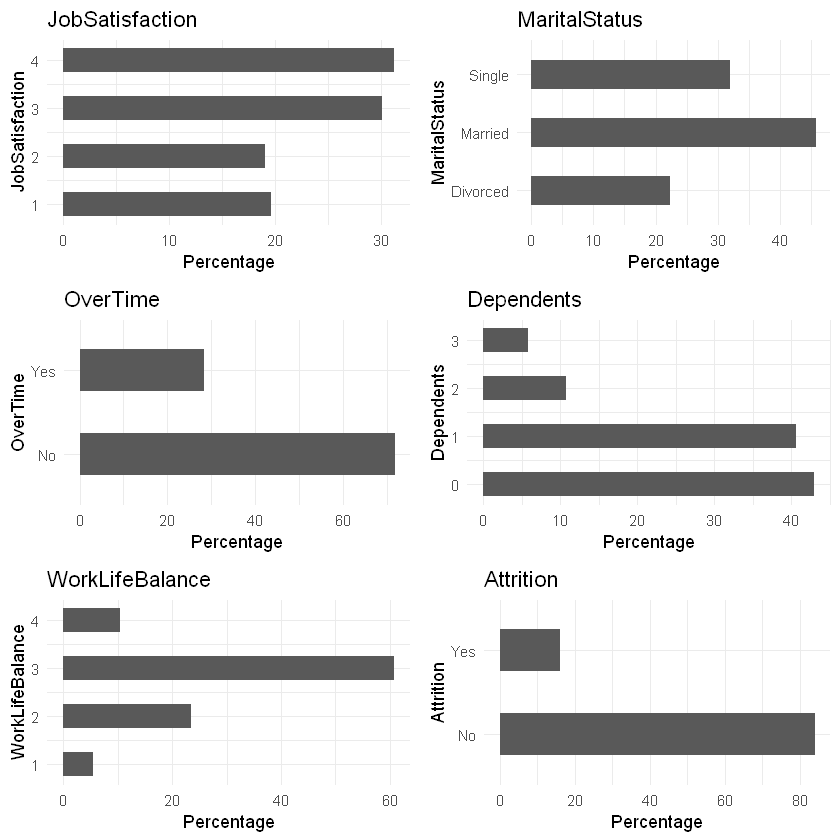

In [14]:
p9 <- ggplot(df_train, aes(x=JobSatisfaction)) + ggtitle("JobSatisfaction") + xlab("JobSatisfaction") +
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p10 <- ggplot(df_train, aes(x=MaritalStatus)) + ggtitle("MaritalStatus") + xlab("MaritalStatus") + 
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p11 <- ggplot(df_train, aes(x=OverTime)) + ggtitle("OverTime") + xlab("OverTime") + 
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p12 <- ggplot(df_train, aes(x=StockOptionLevel)) + ggtitle("Dependents") + xlab("Dependents") +
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p13 <- ggplot(df_train, aes(x=WorkLifeBalance)) + ggtitle("WorkLifeBalance") + xlab("WorkLifeBalance") +
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p14 <- ggplot(df_train, aes(x=Attrition)) + ggtitle("Attrition") + xlab("Attrition") +
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
grid.arrange(p9, p10, p11, p12,p13,p14, ncol=2)

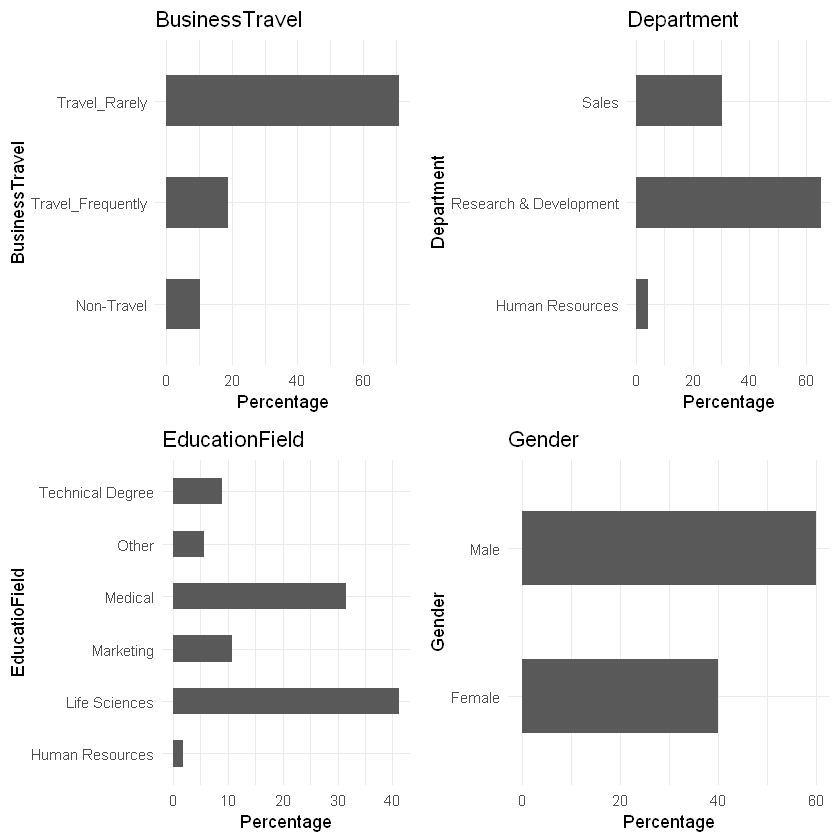

In [15]:
# Categorical variable analysis
p1 <- ggplot(df_train, aes(x=BusinessTravel)) + ggtitle("BusinessTravel") + xlab("BusinessTravel") +
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p2 <- ggplot(df_train, aes(x=Department)) + ggtitle("Department") + xlab("Department") + 
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p3 <- ggplot(df_train, aes(x=EducationField)) + ggtitle("EducationField") + xlab("EducatioField") + 
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p4 <- ggplot(df_train, aes(x=Gender)) + ggtitle("Gender") + xlab("Gender") +
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
grid.arrange(p1, p2, p3, p4, ncol=2)

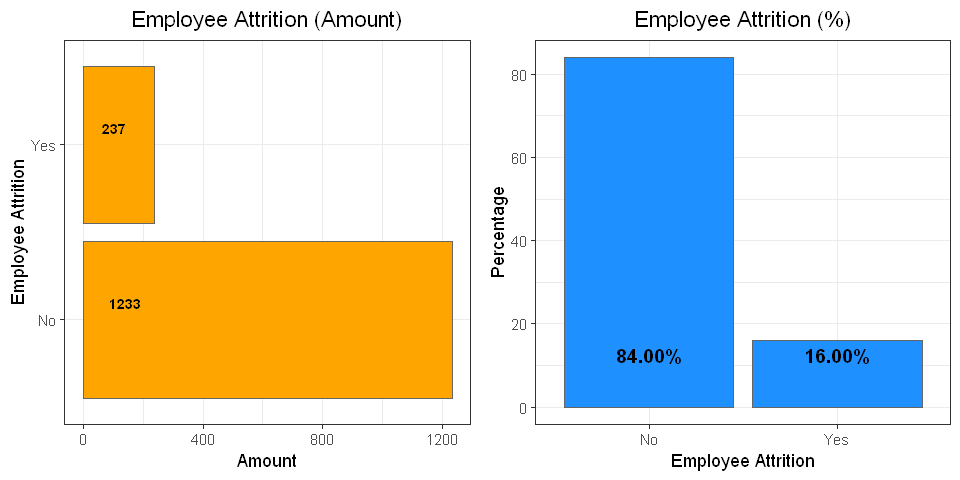

In [16]:
options(repr.plot.width=8, repr.plot.height=4)

attritions_number <- df_train %>% group_by(Attrition) %>% summarise(Count=n()) %>%
ggplot(aes(x=Attrition, y=Count)) + geom_bar(stat="identity", fill="orange", color="grey40") + theme_bw() + coord_flip() + 
geom_text(aes(x=Attrition, y=0.01, label= Count),
            hjust=-0.8, vjust=-1, size=3, 
            colour="black", fontface="bold",
         angle=360) + labs(title="Employee Attrition (Amount)", x="Employee Attrition",y="Amount") + theme(plot.title=element_text(hjust=0.5))
attrition_percentage <- df_train %>% group_by(Attrition) %>% summarise(Count=n()) %>% 
mutate(pct=round(prop.table(Count),2) * 100) %>% 
ggplot(aes(x=Attrition, y=pct)) + geom_bar(stat="identity", fill = "dodgerblue", color="grey40") + 
geom_text(aes(x=Attrition, y=0.01, label= sprintf("%.2f%%", pct)),
            hjust=0.5, vjust=-3, size=4, 
            colour="black", fontface="bold") + theme_bw() + labs(x="Employee Attrition", y="Percentage") + 
labs(title="Employee Attrition (%)") + theme(plot.title=element_text(hjust=0.5))


plot_grid(attritions_number, attrition_percentage, align="h", ncol=2)

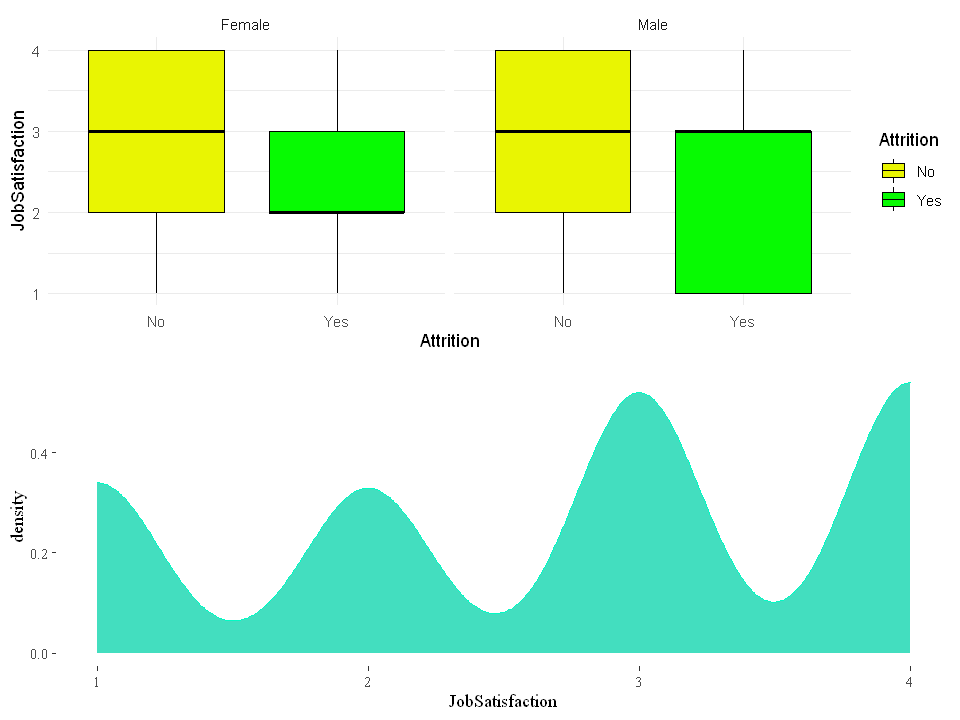

In [17]:
# Boxplot with attrition in the X-axis and Job Satisfaction in the y-Axis
options(repr.plot.width=8, repr.plot.height=6) 

box.attrition <- df_train %>% select(Attrition, JobSatisfaction, Gender) %>% 
ggplot(aes(x=Attrition, y=JobSatisfaction, fill=Attrition)) + geom_boxplot(color="black") + theme_minimal() + facet_wrap(~Gender) + 
scale_fill_manual(values=c("#e9f502", "#07fa02"))

# Distribution of Job Satisfaction
dist.satisfaction <- df_train %>% select(JobSatisfaction) %>%
ggplot(aes(x=JobSatisfaction)) + geom_density(color="#02fac4", fill="#43debf", trim=TRUE) + theme_tufte() + xlim(range(c(1,4)))

plot_grid(box.attrition, dist.satisfaction, nrow=2)

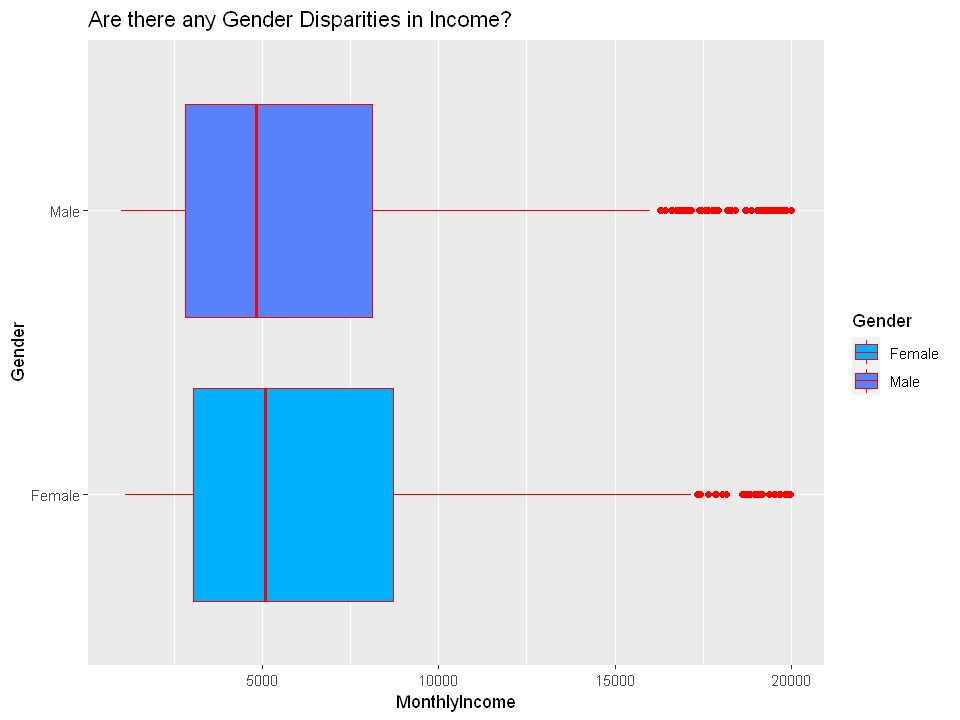

In [18]:
p <- ggplot(df_train, aes(x=Gender, y=MonthlyIncome, color=Gender, fill=Gender)) + geom_boxplot() + 
scale_fill_manual(values=c("#00b1fc", "#5882FA")) + scale_color_manual(values=c("#ff0000", "#ff0000")) +
coord_flip() + labs(title="Are there any Gender Disparities in Income?")

p

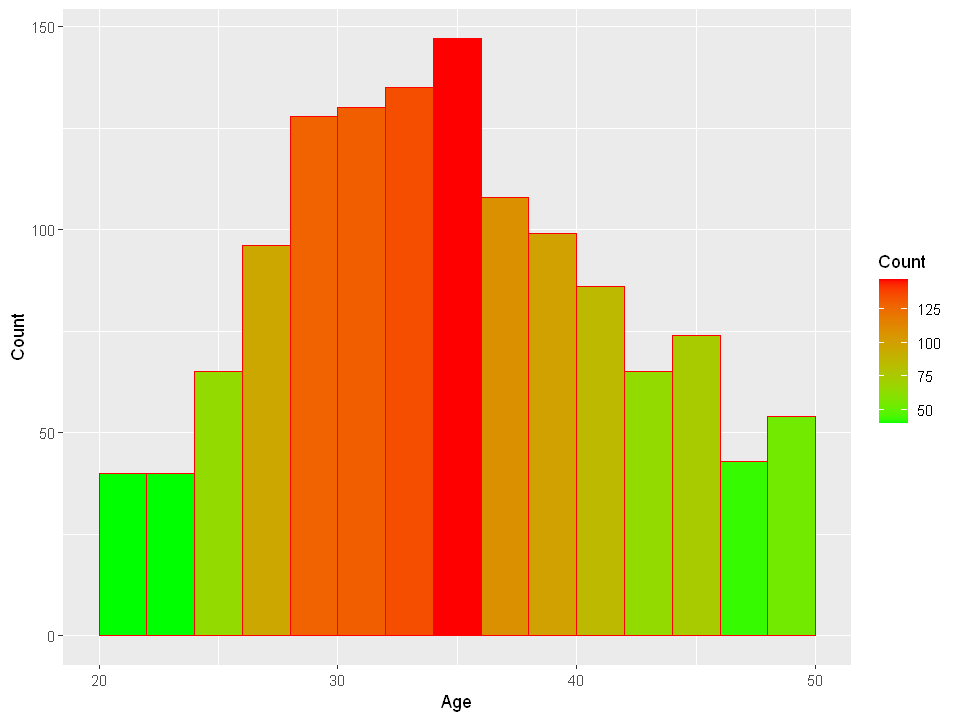

In [19]:
ggplot(data=df_train, aes(df_train$Age)) + 
        geom_histogram(breaks=seq(20, 50, by=2), 
                       col="red", 
                       aes(fill=..count..))+
        labs(x="Age", y="Count")+
        scale_fill_gradient("Count", low="green", high="red")

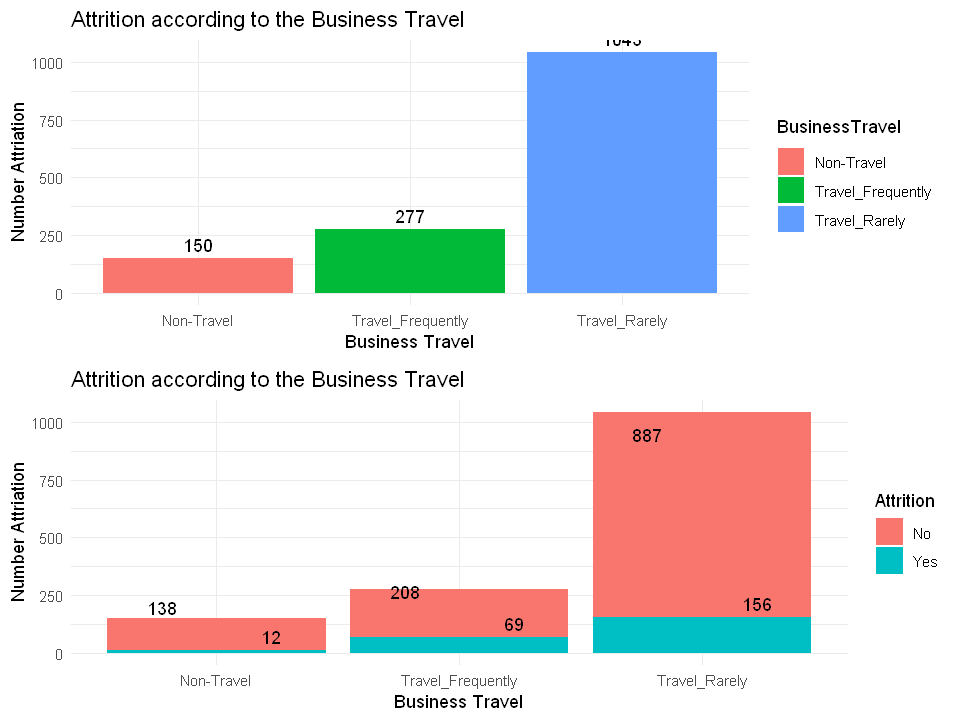

In [20]:
a1 <- df_train %>%
        group_by(BusinessTravel) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=BusinessTravel)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))
a2<- df_train %>%
        group_by(BusinessTravel, Attrition) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))


grid.arrange(a1,a2)

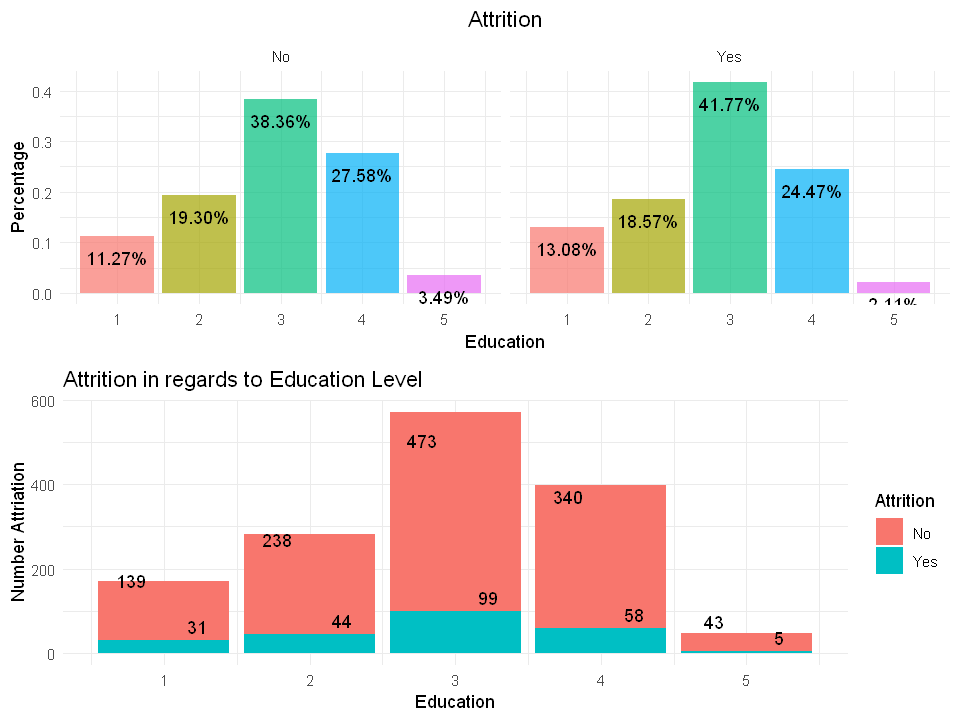

In [21]:
g1<- df_train %>%
        ggplot(aes(x = Education, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 2) +
        labs(y = "Percentage", fill= "Education") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")
g2<- df_train %>%
        group_by(Education, Attrition) %>%
        tally() %>%
        ggplot(aes(x = Education, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="Education", y="Number Attriation")+
        ggtitle("Attrition in regards to Education Level")

grid.arrange(g1,g2)

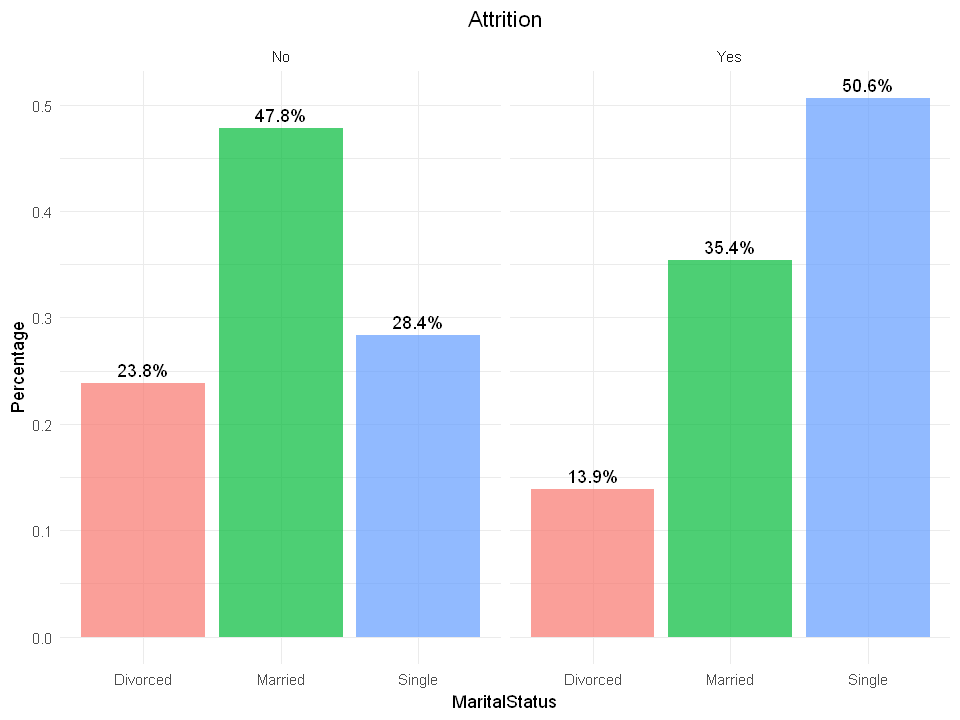

In [22]:
df_train %>%
        ggplot(aes(x = MaritalStatus, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "MaritalStatus") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

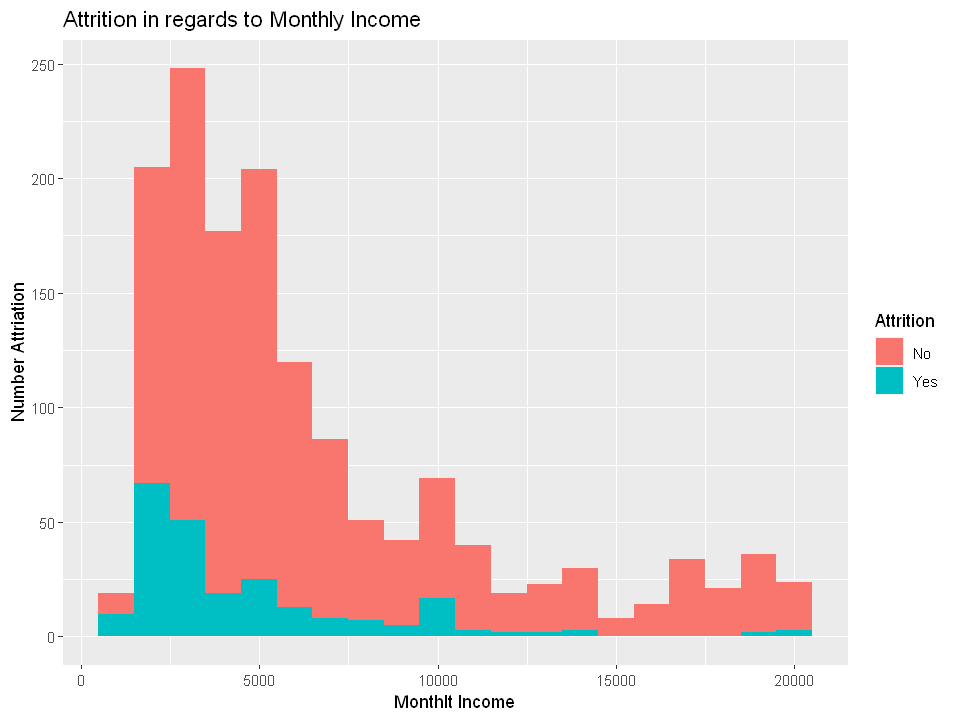

In [23]:
df_train %>%
        ggplot(mapping = aes(x = MonthlyIncome)) + 
        geom_histogram(aes(fill = Attrition), bins=20)+
        labs(x="Monthlt Income", y="Number Attriation")+
        ggtitle("Attrition in regards to Monthly Income")

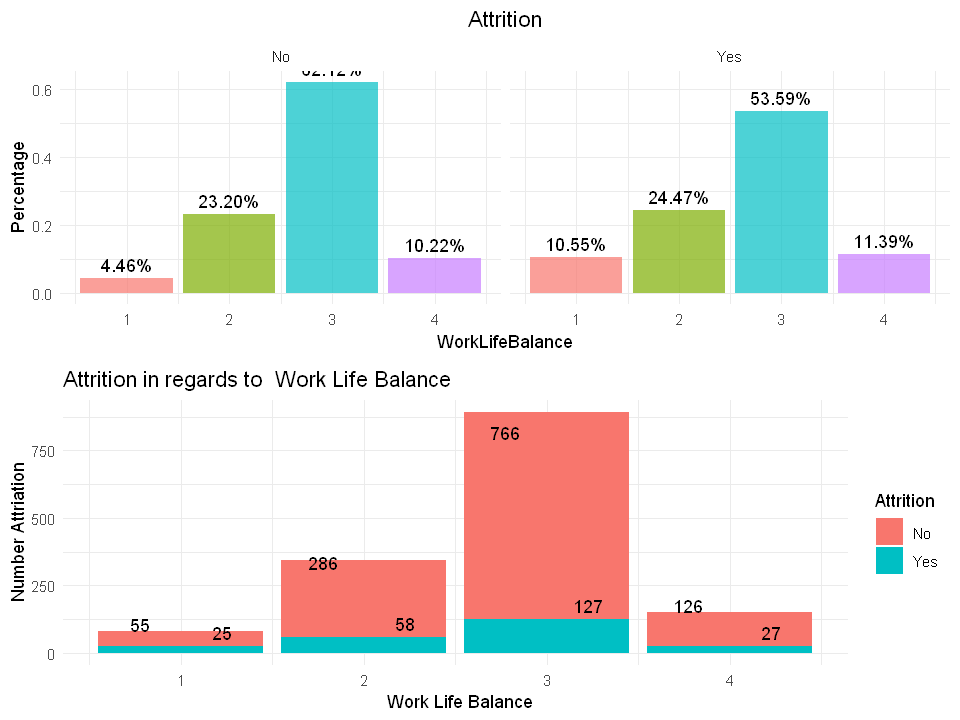

In [24]:
g1<-df_train %>%
        ggplot(aes(x = WorkLifeBalance, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "WorkLifeBalance") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")
g2<- df_train %>%
        group_by(WorkLifeBalance, Attrition) %>%
        tally() %>%
        ggplot(aes(x = WorkLifeBalance, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="  Work Life Balance", y="Number Attriation")+
        ggtitle("Attrition in regards to  Work Life Balance")
grid.arrange(g1,g2)

# ONEHot encoding

In [105]:
library(mltools)
library(data.table)

In [106]:
df_train$Attrition<-ifelse(df_train$Attrition=="No",'0',df_train$Attrition)

df_train$Attrition<-ifelse(df_train$Attrition=="Yes",'1',df_train$Attrition)

df_train$Attrition<-ifelse(df_train$Attrition=="2",'1',df_train$Attrition)

In [107]:
table(df_train$Attrition)


   0    1 
1233  237 

In [108]:
df_train$Attrition<-as.numeric(df_train$Attrition)

In [109]:
en_data <- one_hot(as.data.table(df_train))

In [110]:
smp_size = floor(nrow(en_data)*0.8)
traindata_en = sample(nrow(en_data),size=smp_size)
set.seed(12345)
train = en_data[traindata_en,]
test = en_data[-traindata_en,]

In [230]:
train_tree=train
test_tree=test
train_rnd=train
test_rnd=test
train_bn=train
test_bn=test
train_svm=train
test_svm=test


In [63]:
Log_onemodel <- glm(Attrition~.,train,family=binomial())

In [64]:
Log_onemodel


Call:  glm(formula = Attrition ~ ., family = binomial(), data = train)

Coefficients:
                        (Intercept)                                  Age  
                          8.273e+00                           -2.627e-02  
        `BusinessTravel_Non-Travel`     BusinessTravel_Travel_Frequently  
                         -1.315e+00                            7.876e-01  
       BusinessTravel_Travel_Rarely                            DailyRate  
                                 NA                           -1.197e-04  
       `Department_Human Resources`  `Department_Research & Development`  
                         -1.342e+01                            7.942e-01  
                   Department_Sales                     DistanceFromHome  
                                 NA                            4.481e-02  
                          Education     `EducationField_Human Resources`  
                          1.036e-01                           -2.556e-01  
     `Educati

In [65]:
Log_onetrainpred <- predict(Log_onemodel,train,type='response')
Log_onepred <- predict(Log_onemodel,test,type = 'response')

In [66]:
train$Log_onetrainpred <- ifelse(Log_onetrainpred<0.5,0,1)
test$Log_onepred <- ifelse(Log_onepred<0.5,0,1)

In [67]:
conf_matrix<-table(train$Attrition,train$Log_onetrainpred)
conf_matrix

   
      0   1
  0 963  24
  1  97  92

In [68]:
xtabs(~Attrition+Log_onepred,data=test)

         Log_onepred
Attrition   0   1
        0 236  10
        1  29  19

In [69]:
sensitivity(conf_matrix)

[1] "The Sensitivity :"


In [70]:
specificity(conf_matrix)

[1] 0.7931034

In [71]:
precision(conf_matrix)

[1] 0.9756839

In [72]:
roc(train$Log_onetrainpred,train$Attrition)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = train$Log_onetrainpred, predictor = train$Attrition)

Data: train$Attrition in 1060 controls (train$Log_onetrainpred 0) < 116 cases (train$Log_onetrainpred 1).
Area under the curve: 0.8508

# Decision tree

In [73]:
tree <- rpart(Attrition~.,train_tree,method = 'class')

In [75]:
tree

n= 1176 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1176 189 0 (0.83928571 0.16071429)  
    2) OverTime_No>=0.5 842  88 0 (0.89548694 0.10451306)  
      4) TotalWorkingYears>=2.5 773  65 0 (0.91591203 0.08408797)  
        8) NumCompaniesWorked< 4.5 588  37 0 (0.93707483 0.06292517) *
        9) NumCompaniesWorked>=4.5 185  28 0 (0.84864865 0.15135135)  
         18) Age>=37.5 100   7 0 (0.93000000 0.07000000) *
         19) Age< 37.5 85  21 0 (0.75294118 0.24705882)  
           38) StockOptionLevel>=0.5 51   4 0 (0.92156863 0.07843137) *
           39) StockOptionLevel< 0.5 34  17 0 (0.50000000 0.50000000)  
             78) NumCompaniesWorked>=7.5 13   2 0 (0.84615385 0.15384615) *
             79) NumCompaniesWorked< 7.5 21   6 1 (0.28571429 0.71428571) *
      5) TotalWorkingYears< 2.5 69  23 0 (0.66666667 0.33333333)  
       10) JobRole_Research Scientist>=0.5 22   1 0 (0.95454545 0.04545455) *
       11) JobRole_Research Scientist< 0.5 47  

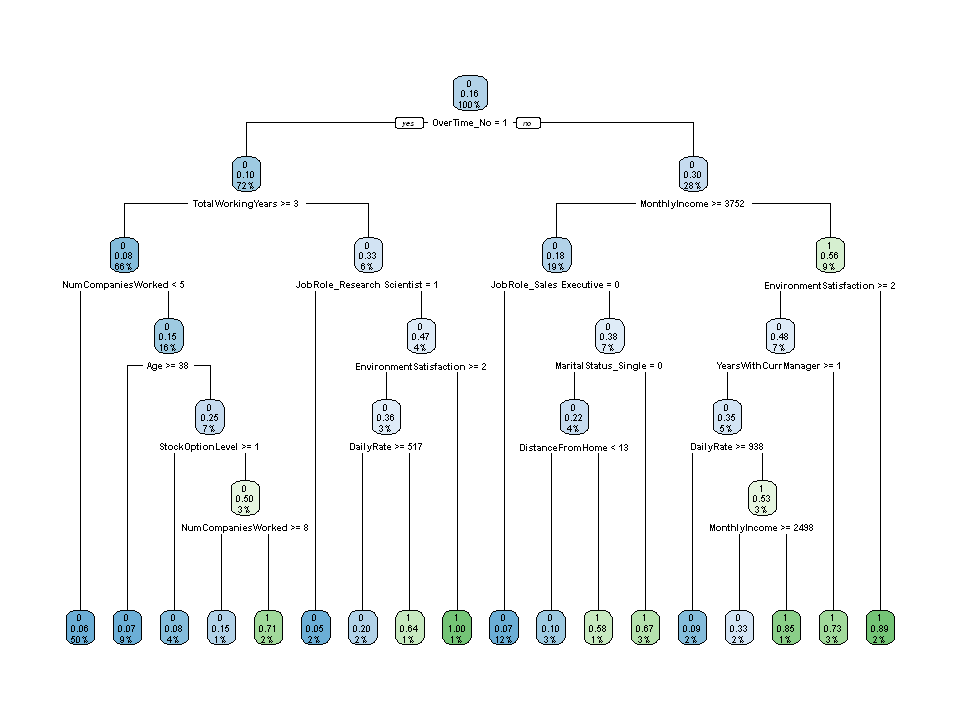

In [76]:
rpart.plot(tree)

In [77]:
train_tree$predict <-predict(tree,train_tree,type='class')

In [81]:
accuracy(train_tree$predict,train_tree$Attrition,0.5)

$accuracyNum
   ypred
y     0   1
  0 949  80
  1  38 109

$accuracyPer
   ypred
y       0     1
  0 92.23  7.77
  1 25.85 74.15

$overallAcc
[1] 89.97


In [82]:
conf_matrix<-table(train_tree$Attrition,train_tree$predict)
conf_matrix

   
      0   1
  0 949  38
  1  80 109

In [83]:
sensitivity(conf_matrix)

[1] 0.9222546

In [84]:
specificity(conf_matrix)

[1] 0.7414966

In [85]:
precision(conf_matrix)

[1] 0.9614995

In [87]:
roc(train_tree$predict,train_tree$Attrition)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = train_tree$predict, predictor = train_tree$Attrition)

Data: train_tree$Attrition in 1029 controls (train_tree$predict 0) < 147 cases (train_tree$predict 1).
Area under the curve: 0.8319

## XGBOOST

In [122]:
library(xgboost)

In [126]:
dMtrain <- xgb.DMatrix(as.matrix(train_rnd %>% select(-Attrition)), label = train_rnd$Attrition)

In [127]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [129]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.800247+0.006760	test-auc:0.681848+0.051291 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:0.938933+0.004687	test-auc:0.807015+0.031724 
[201]	train-auc:0.962928+0.003615	test-auc:0.819004+0.033304 
[301]	train-auc:0.975220+0.002470	test-auc:0.820583+0.033588 
[401]	train-auc:0.984485+0.002137	test-auc:0.821974+0.033503 
[501]	train-auc:0.990019+0.001651	test-auc:0.822885+0.034202 
[601]	train-auc:0.993751+0.001189	test-auc:0.822019+0.033683 
Stopping. Best iteration:
[506]	train-auc:0.990292+0.001642	test-auc:0.823218+0.034319



In [130]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.771279 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:0.941247 
[201]	train-auc:0.964537 
[301]	train-auc:0.978088 
[401]	train-auc:0.986465 
[501]	train-auc:0.991305 
[601]	train-auc:0.994864 
[701]	train-auc:0.997055 
[801]	train-auc:0.998223 
[901]	train-auc:0.998891 
[1001]	train-auc:0.999408 
[1101]	train-auc:0.999704 
[1201]	train-auc:0.999838 
[1301]	train-auc:0.999892 
[1401]	train-auc:0.999946 
[1501]	train-auc:0.999989 
Stopping. Best iteration:
[1496]	train-auc:0.999989



In [131]:
xgb_trainpred <- predict(model_xgb,dMtrain)

In [132]:
train_rnd$xgb_trainpred <- ifelse(xgb_trainpred < 0.5,0,1)

In [135]:
accuracy(train_rnd$xgb_trainpred,train_rnd$Attrition,0.5)

$accuracyNum
   ypred
y     0   1
  0 988   7
  1   0 181

$accuracyPer
   ypred
y       0     1
  0  99.3   0.7
  1   0.0 100.0

$overallAcc
[1] 99.4


In [137]:
conf_matrix<-table(train_rnd$xgb_trainpred,train_rnd$Attrition)
conf_matrix

   
      0   1
  0 988   7
  1   0 181

In [138]:
sensitivity(conf_matrix)

[1] 1

In [139]:
specificity(conf_matrix)

[1] 0.962766

In [140]:
precision(conf_matrix)

[1] 0.9929648

In [141]:
roc(train_rnd$xgb_trainpred,train_rnd$Attrition)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = train_rnd$xgb_trainpred, predictor = train_rnd$Attrition)

Data: train_rnd$Attrition in 995 controls (train_rnd$xgb_trainpred 0) < 181 cases (train_rnd$xgb_trainpred 1).
Area under the curve: 0.9965

## Support Vector Machiene

In [201]:
library(e1071)
set.seed(23)

In [231]:
svm_model <- svm(Attrition~ ., data = train_svm)

In [232]:
summary(svm_model1)


Call:
svm(formula = Attrition ~ ., data = train_svm)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01818182 
    epsilon:  0.1 


Number of Support Vectors:  1176






In [233]:
svm_trainpredict <- predict(svm_model,train_svm)
svm_testpredict <- predict(svm_model,test_svm)

In [234]:
train_svm$svm_trainpredict <- ifelse(svm_trainpredict<0.5,0,1)


test_svm$svm_testpredict <- ifelse(svm_testpredict<0.5,0,1)

In [235]:
accuracy(train_svm$svm_trainpredict,train_svm$Attrition,0.5)

$accuracyNum
   ypred
y     0   1
  0 988   0
  1   0 188

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [239]:
print("svm model is the best model with 100 % accuracy" )

[1] "svm model is the best model with 100 % accuracy"
